In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from pycocotools.coco import COCO

In [6]:
dataDir='./'
dataType='val2014'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
imageDir = '{}/{}/'.format(dataDir, dataType)

loading annotations into memory...
Done (t=9.55s)
creating index...
index created!


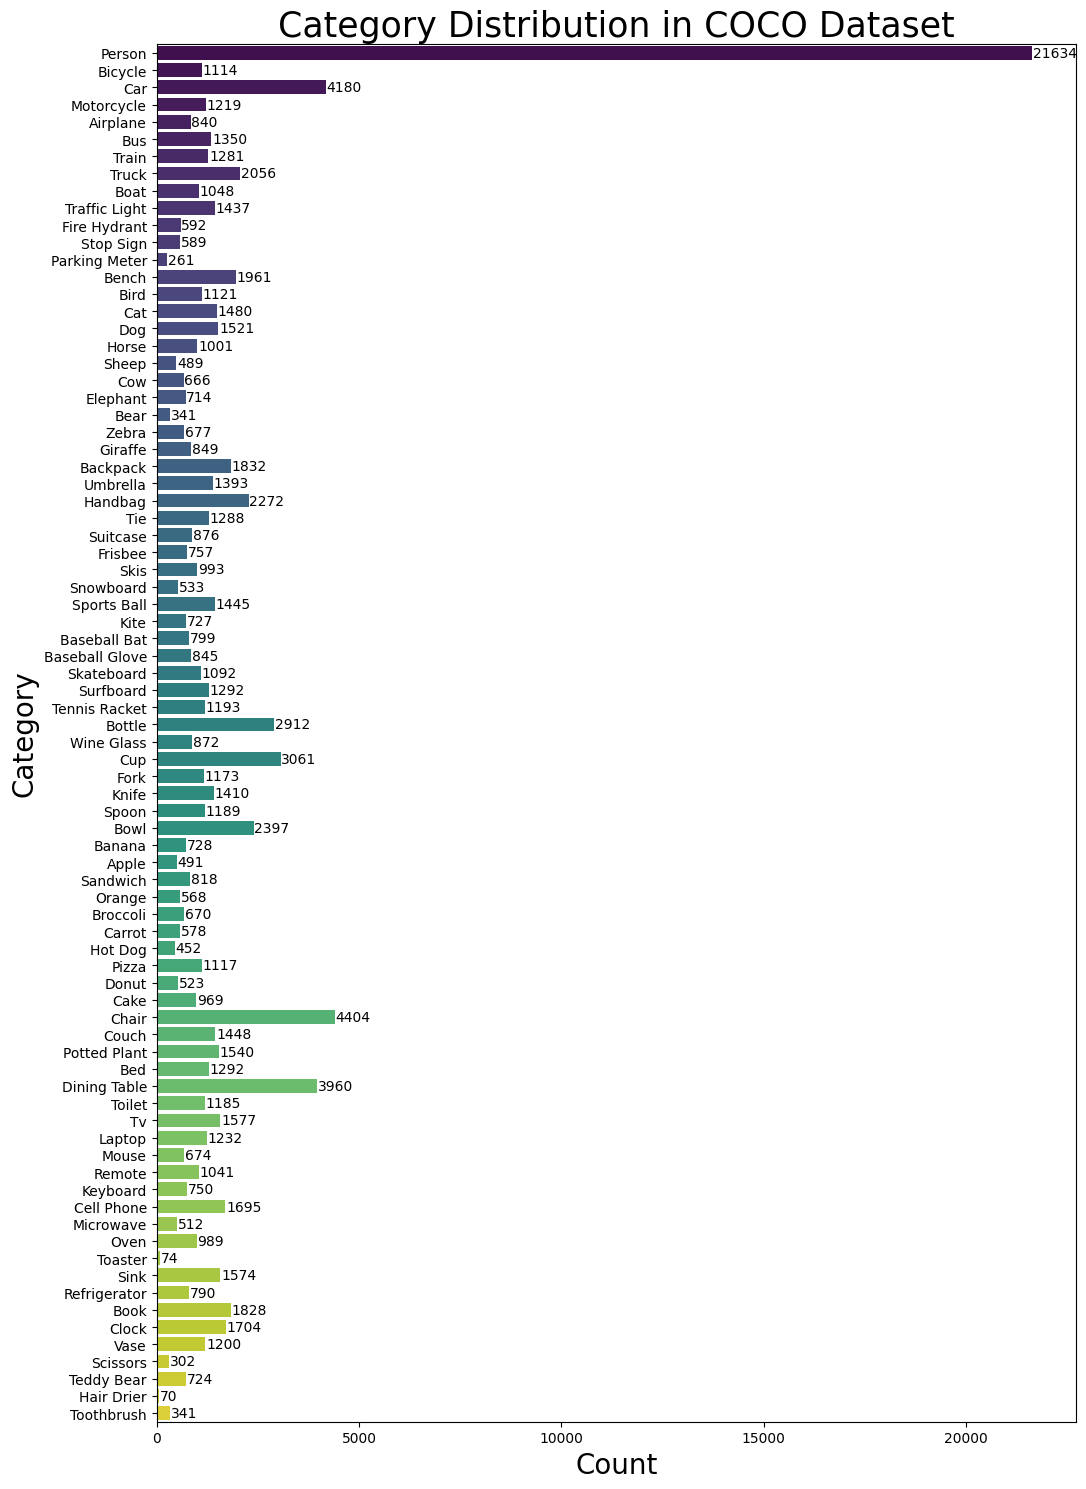

In [3]:
# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

# Get category names
category_names = [cat['name'].title() for cat in cats]

# Get category counts
category_counts = [coco.getImgIds(catIds=[cat['id']]) for cat in cats]
category_counts = [len(img_ids) for img_ids in category_counts]


# Create a color palette for the plot
colors = sns.color_palette('viridis', len(category_names))

# Create a horizontal bar plot to visualize the category counts
plt.figure(figsize=(11, 15))
sns.barplot(x=category_counts, y=category_names, palette=colors)

# Add value labels to the bars
for i, count in enumerate(category_counts):
    plt.text(count + 20, i, str(count), va='center')
plt.xlabel('Count',fontsize=20)
plt.ylabel('Category',fontsize=20)
plt.title('Category Distribution in COCO Dataset',fontsize=25)
plt.tight_layout()
plt.savefig('coco-cats.png',dpi=300)
plt.show()

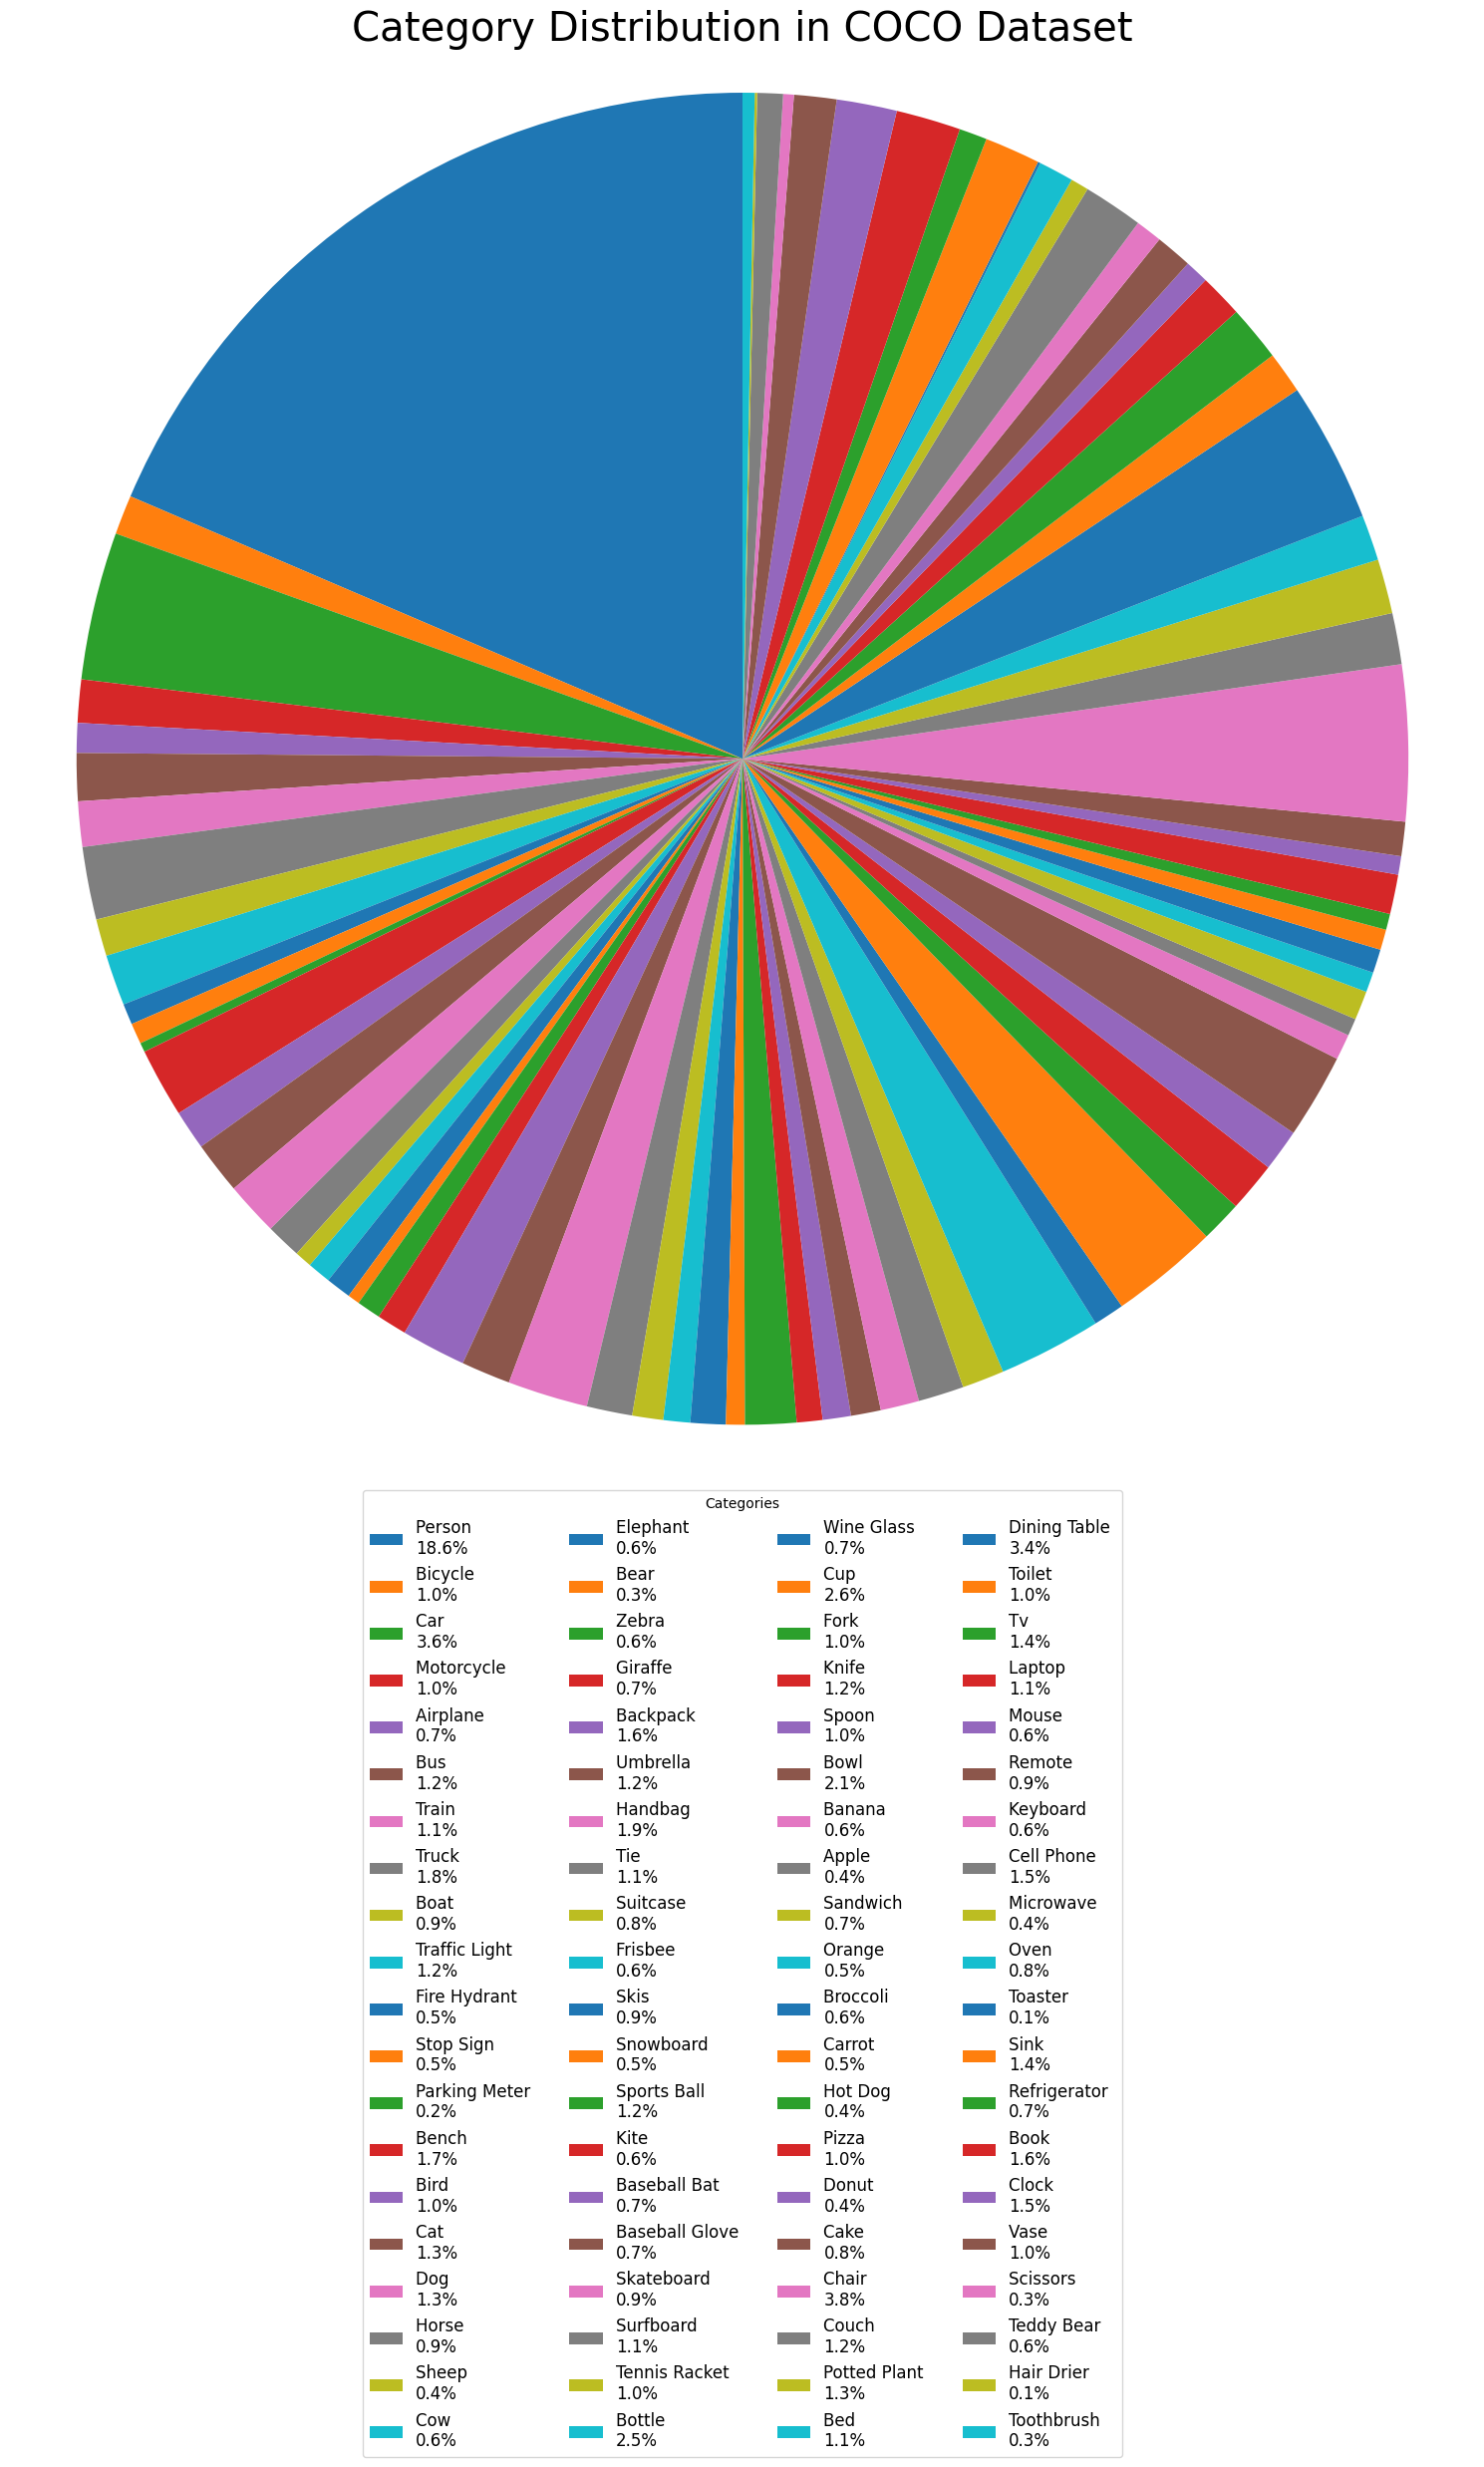

In [4]:
# Calculate percentage for each category
total_count = sum(category_counts)
category_percentages = [(count / total_count) * 100 for count in category_counts]


# Create a pie chart to visualize the category distribution
plt.figure(figsize=(15, 24.9))


# Customize labels properties
labels = [f"{name} " for name, percentage in zip(category_names, category_percentages)]
label_props = {"fontsize": 25, 
               "bbox": {"edgecolor": "white", 
                        "facecolor": "white", 
                        "alpha": 0.7, 
                        "pad": 0.5}
              }

# Add percentage information to labels, and set labeldistance to remove labels from the pie
wedges, _, autotexts = plt.pie(category_counts, 
                              autopct='', 
                              startangle=90, 
                              textprops=label_props, 
                              pctdistance=0.85)

# Create the legend with percentages
legend_labels = [f"{label}\n{category_percentages[i]:.1f}%" for i, label in enumerate(labels)]
plt.legend(wedges, legend_labels, title="Categories", loc="upper center", bbox_to_anchor=(0.5, -0.01), 
           ncol=4, fontsize=12)

plt.axis('equal')
plt.title('Category Distribution in COCO Dataset', fontsize=29)
plt.tight_layout()
plt.savefig('coco-dis.png', dpi=300)
plt.show()

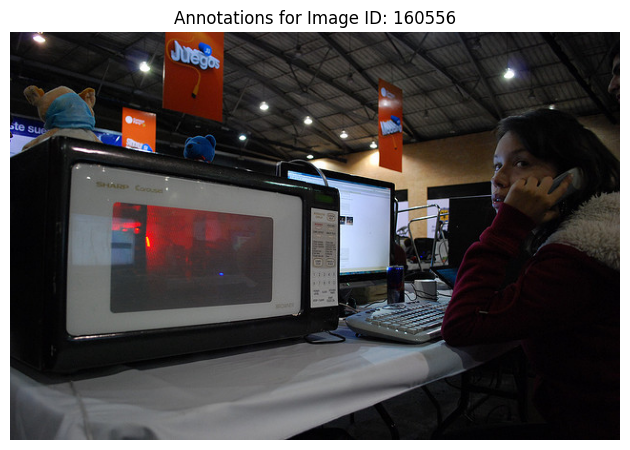

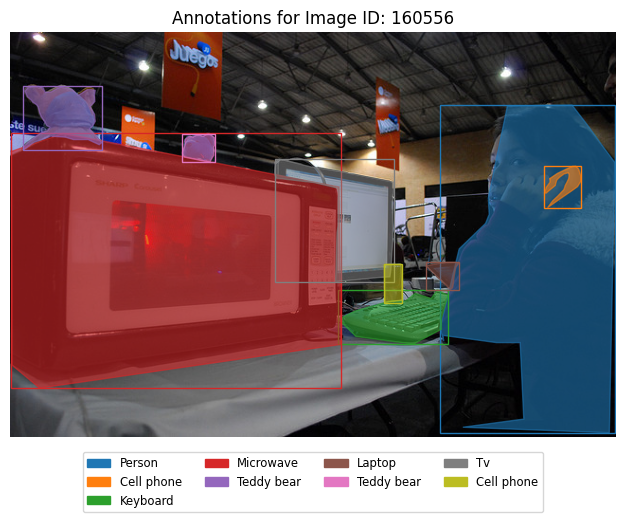

In [12]:
# Define the classes (out of the 80) which you want to see. Others will not be shown.
filterClasses = ['laptop', 'tv', 'cell phone']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses)

# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)

# Load a random image from the filtered list
if len(imgIds) > 0:
    image_id = imgIds[np.random.randint(len(imgIds))]  # Select a random image ID
    image_info = coco.loadImgs(image_id)

    if image_info is not None and len(image_info) > 0:
        image_info = image_info[0]
        image_path = imageDir + image_info['file_name']

        # Load the annotations for the image
        annotation_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotation_ids)

        # Get category names and assign colors for annotations
        category_names = [coco.loadCats(ann['category_id'])[0]['name'].capitalize() for ann in annotations]
        category_colors = list(matplotlib.colors.TABLEAU_COLORS.values())

        # Load the image and plot it
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('Img.png',dpi=350)
        plt.show()
        
        plt.imshow(image)
        plt.axis('off')

        # Display bounding boxes and segmented colors for each annotation
        for ann, color in zip(annotations, category_colors):
            bbox = ann['bbox']
            segmentation = ann['segmentation']

            # Display bounding box
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,
                                     edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)

            # Display segmentation masks with assigned colors
            for seg in segmentation:
                poly = np.array(seg).reshape((len(seg) // 2, 2))
                plt.fill(poly[:, 0], poly[:, 1], color=color, alpha=0.6)

        # Create a legend with category names and colors
        legend_patches = [patches.Patch(color=color, label=name) for color, name in zip(category_colors, category_names)]
        plt.legend(handles=legend_patches, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.2), fontsize='small')

        # Show the image with legend
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('annImg.png',dpi=350)
        plt.show()
    else:
        print("No image information found for the selected image ID.")
else:
    print("No images found for the desired classes.")